In [29]:
# Multiple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Encoding categorical data
label_encoder_X = LabelEncoder()
X[:, 3] = label_encoder_X.fit_transform(X[:, 3])

# One-Hot encoding for Country column
ct = ColumnTransformer([ ("State", OneHotEncoder(), [ 3 ]) ], remainder = 'passthrough')
X  = ct.fit_transform(X)

# Avoiding the Dummy Variable Trap
X = X[:, 1:]

# Feature scaling
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test  = sc_X.transform(X_test)

In [30]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [31]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

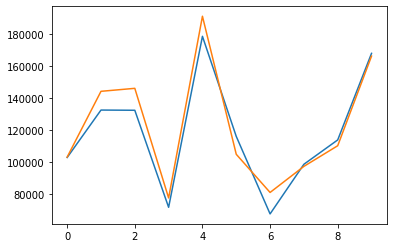

In [33]:
plt.plot(y_pred)
plt.plot(y_test)
plt.show()

In [34]:
# Building the optimal model using Backward Elimination
import statsmodels.api as sm

X = np.append(arr = np.ones((50, 1)).astype(int), values = X, axis = 1)

In [47]:
X_opt = X[:, [ 0, 3 ]]

regressor_OLS = sm.OLS(endog = y, exog = X_opt.astype(float)).fit()

In [48]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Fri, 27 Mar 2020   Prob (F-statistic):           3.50e-32
Time:                        14:01:09   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""